In [2]:
import matplotlib.pyplot as plt

# http://www.ecircuitcenter.com/Circuits.htm
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from pathlib import Path
from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import SubCircuitFactory
from PySpice.Spice.Parser import SpiceParser
from PySpice.Unit import *
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
from PySpice.Spice.Netlist import Circuit
import numpy as np

libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)


In [112]:
# Initialize the Circuit
circuit = Circuit('Name me please')

# Include non-passive elements: 
# D1N4148 is a (regular&cheap) Diode 
circuit.include(spice_library['D1N4148']) 
# TLV3201 is a 0-5 T.I. OpAmp
circuit.include(spice_library['LM741'])
V = 2
w = 20E3
#circuit.V('1', circuit.gnd,1,f'DC 0 AC {V} SIN(0 {V} {w})')
circuit.V('1', 1,circuit.gnd,f'DC 0 AC {V} SIN(0 {V} {w})')
R_1 = 11.2
R_2 = 11.2
R_A = 100000
R_B = 0.001
C_1 = 2000
C_2 = 1000
links = [(1,2),
         (2,3),
         (circuit.gnd,4),
         (4,5),]
R_vector = [R_1,R_2,R_A,R_B,]
for x in range(len(R_vector)):
    circuit.R(str(x+1),  links[x][0], links[x][1],
                                   R_vector[x]@u_kΩ)
circuit.C('1',  2, 5,C_1@u_pF)
circuit.C('2',  circuit.gnd, 3,C_2@u_pF)
circuit.X('opamp','LM741',3,4,'Vcc','Vee',5)
circuit.V('2','Vcc',circuit.gnd,'DC +15')
circuit.V('3','Vee',circuit.gnd,'DC -15')
# Diodo?
#circuit.X('diodus','D1N4148', 1, 2)

print(str(circuit))
print('\n\nCURRENT FREQ: ',w)
from math import sqrt
print('LIMIT FREQ: ',round(1/sqrt((C_1/1E3)*(C_2/1E3)*R_1*R_2*1E-12)/6.3,-2))

.title Name me please
.include /home/m4zz31/anaconda3/lib/python3.7/libraries/D1N4148.lib
.include /home/m4zz31/anaconda3/lib/python3.7/libraries/LM741.lib
V1 1 0 DC 0 AC 2 SIN(0 2 20000.0)
R1 1 2 11.2kOhm
R2 2 3 11.2kOhm
R3 0 4 100000kOhm
R4 4 5 0.001kOhm
C1 2 5 2000pF
C2 0 3 1000pF
Xopamp 3 4 Vcc Vee 5 LM741
V2 Vcc 0 DC +15
V3 Vee 0 DC -15



CURRENT FREQ:  20000.0
LIMIT FREQ:  63100.0


In [113]:
%%html
<img src="./schematic.png" width=550 style="text-align:center"/>

In [114]:
f = w
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
#simulator.initial_condition(cap=-3)                   #use_initial_condition=True
#simulator.initial_condition(out=4)
analysis = simulator.transient(step_time=((1/f)/10)@u_s, end_time=(4/f)@u_s)
#analysis= simulator.transient(step_time=.1@u_ns, end_time=.1@u_us,use_initial_condition=True)

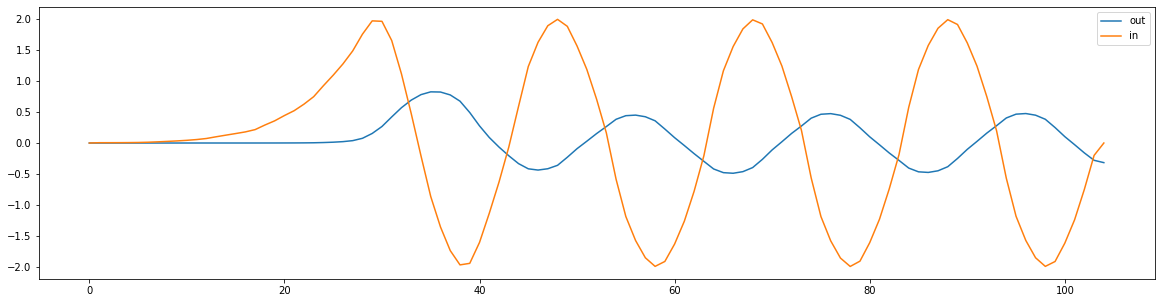

In [115]:
fig, ax = plt.subplots(figsize=(20,5))
#plt.plot(analysis['1']-analysis['2'],label='R')
ax.plot(analysis['5'],label='out')
ax.plot(analysis['1'],label='in')
ax.legend()

In [233]:
# y aca todo junto:
#del(figura)
import random
import matplotlib.pyplot as plt
def doit(w,R_1,R_2,C_1,C_2,optboolean=False):
    circuit = Circuit('Name me please')
    circuit.include(spice_library['D1N4148']) 
    # TLV3201 is a 0-5 T.I. OpAmp
    circuit.include(spice_library['LM741'])
    V = 7
    #w = 20E3
    #circuit.V('1', circuit.gnd,1,f'DC 0 AC {V} SIN(0 {V} {w})')
    circuit.V('1', 1,circuit.gnd,f'DC 0 AC {V} SIN(0 {V} {w})')
    #R_1 = 11.2
    #R_2 = 11.2
    R_A = 100000
    R_B = 0.001
    #C_1 = 2000
    #C_2 = 1000
    links = [(1,2),
             (2,3),
             (circuit.gnd,4),
             (4,5),]
    R_vector = [R_1,R_2,R_A,R_B,]
    for x in range(len(R_vector)):
        circuit.R(str(x+1),  links[x][0], links[x][1],
                                       R_vector[x]@u_kΩ)
    circuit.C('1',  2, 5,C_1@u_pF)
    circuit.C('2',  circuit.gnd, 3,C_2@u_pF)
    circuit.X('opamp','LM741',3,4,'Vcc','Vee',5)
    circuit.V('2','Vcc',circuit.gnd,'DC +15')
    circuit.V('3','Vee',circuit.gnd,'DC -15')
    if optboolean:
        circuit.X('diodus','D1N4148', 2,1)
    f = w
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=((1/f)/10)@u_s, end_time=(4/f)@u_s)    # Printer?
    if False:
        #print(str(circuit))
        fig = plt.figure(figsize=(20,4))  # create a figure object
        ax = fig.add_subplot(1, 1, 1)
        plt.plot(analysis['1']-analysis['2'],label='R')
        plt.plot(analysis['2']-analysis['3'],label='L')
        ax.plot(analysis['3'],label='C')
        #ax.set_ylim(-int(V*1.1)-10,int(V*1.1)+10)
        ax.legend()
        ax.set_title(f'freq : {w}')
        print(f'resonance was at {np.sqrt(1/(L*C))}')
    if True:
        outputter = max(analysis['5'])
        del(circuit)
        return outputter
    return

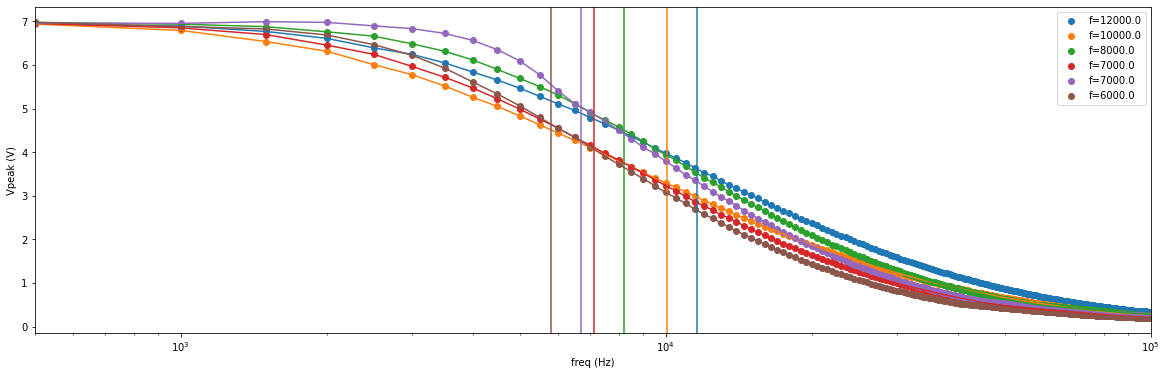

In [137]:
from math import sqrt 
fig, ax = plt.subplots(figsize=(20,6))
for C_1 in [1000,2000,3000]:
    for C_2 in [1500,2000]:
        f_zero = 1/sqrt((C_1/1E3)*(C_2/1E3)*R_1*R_2*1E-12)/2/np.pi
        #print(f'f_zero es {int(f_zero)}')
        try: 
            x = [i for i in range(1,100000,500)]
        except: break
        y = []
        R_1 = 11.2
        R_2 = 11.2
        #alpha = R / L * 1000
        for j in x:
            y.append(float(doit(j,R_1,R_2,C_1,C_2)))
        #ax.axvspan(f_zero-alpha/2,f_zero+alpha/2,alpha=0.2)
        ax.scatter(x,y,label=f'f={round(f_zero,-3)}')
        ax.plot(x,y)
        col = plt.gca().lines[-1].get_color()
        ax.axvline(linewidth=1.5,color=col, x=f_zero)
ax.set_xlabel('freq (Hz)')
ax.set_ylabel('Vpeak (V)')
ax.legend()
ax.set_xscale('log')
ax.set_xlim([500,100000])
plt.show()

<img src="./info.png" width=200 hyeight=160 style="text-align:center;"/>

2020-07-22 02:05:48,786 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH


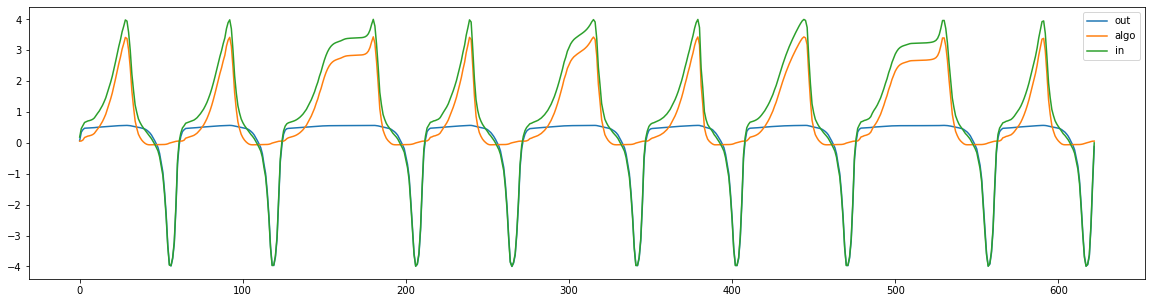

In [6]:
# TESTING WHERE TO PUT THE DIODE!

#del(circuit)
# Initialize the Circuit
circuit = Circuit('Name me please')

# Include non-passive elements: 
# D1N4148 is a (regular&cheap) Diode 
circuit.include(spice_library['D1N4148']) 
# TLV3201 is a 0-5 T.I. OpAmp
circuit.include(spice_library['LM741'])
V = 4
w = 200
#circuit.V('1', circuit.gnd,1,f'DC 0 AC {V} SIN(0 {V} {w})')
circuit.V('1', 1,circuit.gnd,f'DC 0 AC {V} SIN(0 {V} {w})')
R_1 = 11.2
R_2 = 11.2
#R_1 = 2
#R_2 = 65
R_A = 100000
R_B = 0.001
C_1 = 2000
C_2 = 1000
links = [
         (1,2),
         (2,3),
         (circuit.gnd,4),
         (4,5),]
R_vector = [R_1,R_2,R_A,R_B,]
for x in range(len(R_vector)):
    circuit.R(str(x+1),  links[x][0], links[x][1],
                                   R_vector[x]@u_kΩ)
#from math import sqrt
#print('LIMIT FREQ: ',round(1/sqrt((C_1/1E3)*(C_2/1E3)*R_1*R_2*1E-12),-2))
#print('\n\nCURRENT FREQ: ',w)
circuit.C('1',  2, 5,C_1@u_pF)
circuit.C('2',  circuit.gnd, 3,C_2@u_pF)
circuit.X('opamp','LM741',3,4,'Vcc','Vee',5)
circuit.V('2','Vcc',circuit.gnd,'DC +15')
circuit.V('3','Vee',circuit.gnd,'DC -15')
circuit.X('diodus','D1N4148', 2,1)
#circuit.R('L','C',1,0.001@u_kΩ)
f = w
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=((1/f)/10)@u_s, end_time=(2+9/f)@u_s,start_time=2@u_s)
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(analysis['5'],label='out')
ax.plot(analysis['1']-analysis['2'],label='algo')
#ax.plot(analysis['C']-analysis['1'],label='current?')
ax.plot(analysis['1'],label='in')
ax.legend()

In [232]:
%%html
<img src="./schematic_dioded.png" width=550 style="text-align:center"/>

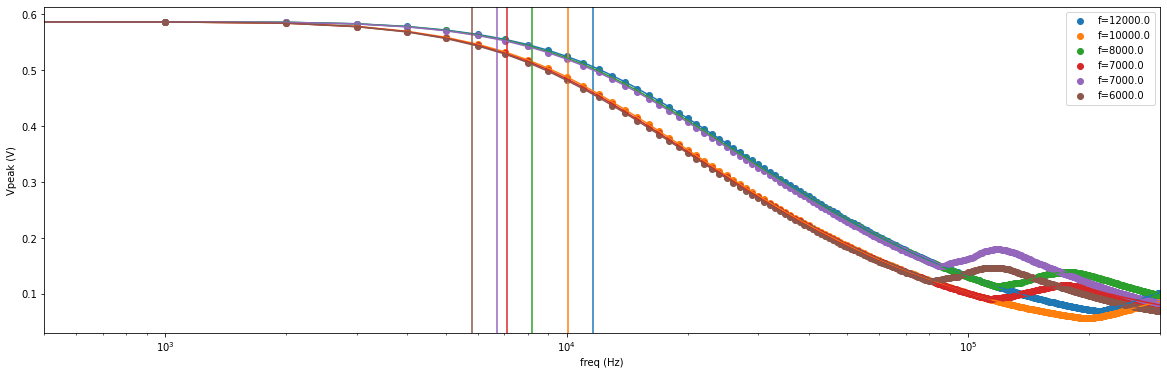

In [235]:
# Mirar las nuevas curvas en funcion de la freq ahora que tenemos un diodo...
from math import sqrt 
fig, ax = plt.subplots(figsize=(20,6))
for C_1 in [1000,2000,3000]:
    for C_2 in [1500,2000]:
        f_zero = 1/sqrt((C_1/1E3)*(C_2/1E3)*R_1*R_2*1E-12)/2/np.pi
        #print(f'f_zero es {int(f_zero)}')
        try: 
            x = [i for i in range(1,300000,1000)]
        except: break
        y = []
        R_1 = 11.2
        R_2 = 11.2
        #alpha = R / L * 1000
        for j in x:
            y.append(float(doit(j,R_1,R_2,C_1,C_2,True)))
        #ax.axvspan(f_zero-alpha/2,f_zero+alpha/2,alpha=0.2)
        ax.scatter(x,y,label=f'f={round(f_zero,-3)}')
        ax.plot(x,y)
        col = plt.gca().lines[-1].get_color()
        ax.axvline(linewidth=1.5,color=col, x=f_zero)
ax.set_xlabel('freq (Hz)')
ax.set_ylabel('Vpeak (V)')
ax.legend()
ax.set_xscale('log')
ax.set_xlim([500,300000])
plt.show()

In [12]:
import random
import matplotlib.pyplot as plt

def doit2(w,V,R_1,R_2,C_1,C_2,ax=False):
    #print('recieved variables: ',
    #    w,V,R_1,R_2,C_1,C_2)
    circuit = Circuit('Name me please')
    circuit.include(spice_library['D1N4148']) 
    circuit.include(spice_library['LM741'])
    circuit.V('1', 1,circuit.gnd,f'DC 0 AC {V} SIN(0 {V} {w})')
    R_A = 100000
    R_B = 0.001
    links = [(1,2),
             (2,3),
             (circuit.gnd,4),
             (4,5),]
    R_vector = [R_1,R_2,R_A,R_B,]
    for x in range(len(R_vector)):
        circuit.R(str(x+1),  links[x][0], links[x][1],
                                       R_vector[x]@u_kΩ)
    circuit.C('1',  2, 5,C_1@u_pF)
    circuit.C('2',  circuit.gnd, 3,C_2@u_pF)
    circuit.X('opamp','LM741',3,4,'Vcc','Vee',5)
    circuit.V('2','Vcc',circuit.gnd,'DC +15')
    circuit.V('3','Vee',circuit.gnd,'DC -15')
    circuit.X('diodus','D1N4148', 2,1)
    f = w
    tf = 3/w
    t0 = 1
    #print(f'tiempo de {t0} a {t0+tf} con step time {(1/f)/10} y freq actualmente {w}')
    treshold = 4
    #print('empezando simulacion....')
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    #analysis = simulator.transient(step_time=((1/f)/10)@u_s, start_time=t0@u_s,end_time=(t0+tf)@u_s)
    analysis = simulator.transient(step_time=((1/f)/10)@u_s, end_time=3/w@u_s)
    #print('terminada!')
    if False:
        ax.plot(analysis['5'],label='output')
        ax.plot(analysis['1'],label='input')
        ax.plot(analysis['1']-analysis['2'],label='diodo')
        ax.hlines(4,0,5/w)
        ax.legend()
        ax.set_title(f'R1: {R_1}, R2: {R_2}, C1: {C_1}, C2: {C_2}, V: {V}, W: {w}')
        ax.set_ylim(-15,15)
    auxiliar = analysis['2']-analysis['1']
    del(circuit)        
    return [w,V,R_1,R_2,C_1,C_2,int(float(max(auxiliar))>treshold)]    

import numpy as np

W_vector = np.random.uniform(1,500000,2000) #[int(x*100) for x in range(1,3000)]
V_vector = np.random.uniform(1E-3,200,2000) #[x/10 for x in range(1,150)]
R1_vector = np.random.uniform(1E-2,50000,2000) #[x/20 for x in range(1,51,1)]
R2_vector = np.random.uniform(1E-2,50000,2000) #[x/20 for x in range(1,51,1)]
C1_vector = np.random.uniform(1E-2,10000,2000) #[int(x*100) for x in range(1,100,2)]
C2_vector = np.random.uniform(1E-2,10000,2000) #[int(x*100) for x in range(1,100,2)]
answ = []
veces = 20000
#fig, axy = plt.subplots(veces,1,figsize=(20,int(4*veces)))
counter = 0
errorlog = []
while counter <veces:
    try: 
        answ += [doit2(random.choice(W_vector),
     random.choice(V_vector),
     random.choice(R1_vector),
     random.choice(R2_vector),
     random.choice(C1_vector),
     random.choice(C2_vector),
        #,axy[counter],
                   )]
    except Exception as ins:
        errorlog.append(ins.args)
    counter += 1
import pandas as pd

data = pd.DataFrame(answ,columns=['W','V','R1','R2','C1','C2','D'])
#fig.savefig('algo.png')
data.to_excel('sparse_rc.xlsx',index=False)
if False:
    data.to_excel("FULL.xlsx")
    data[:1700].to_excel("TRAIN.xlsx",index=False)
    data[1700:].to_excel("TEST_cresults.xlsx",index=False)
    data[1700:].drop('D', axis=1).to_excel("TEST.xlsx",index=False)

2020-07-22 02:15:43,353 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:43,371 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:43,387 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:43,402 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:43,421 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:43,437 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:43,448 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:43,466 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:44,246 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:44,264 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:44,282 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:44,297 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:44,315 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:44,331 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:44,353 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:44,370 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:45,099 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:45,116 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:45,131 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:45,155 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:45,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:45,190 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:45,207 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:45,223 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:45,955 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:45,982 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:46,003 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:46,022 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:46,041 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:46,065 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:46,087 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:46,100 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:46,974 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:46,983 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:46,995 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:47,005 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:47,014 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:47,027 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:47,036 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:47,046 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:47,530 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:47,539 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:47,549 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:47,560 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:47,572 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:47,582 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:47,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:47,606 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:48,124 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:48,133 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:48,142 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:48,151 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:48,160 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:48,172 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:48,184 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:48,199 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:48,689 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:48,699 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:48,708 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:48,717 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:48,728 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:48,736 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:48,746 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:48,756 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:49,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:49,228 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:49,244 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:49,261 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:49,276 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:49,292 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:49,309 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:49,324 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:49,766 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:49,778 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:49,787 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:49,795 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:49,803 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:49,811 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:49,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:49,828 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:50,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:50,229 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:50,238 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:50,247 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:50,257 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:50,266 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:50,276 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:50,290 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:50,803 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:50,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:50,835 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:50,854 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:50,868 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:50,879 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:50,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:50,913 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:51,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:51,478 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:51,492 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:51,504 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:51,513 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:51,521 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:51,529 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:51,537 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:52,120 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:52,130 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:52,141 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:52,150 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:52,161 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:52,175 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:52,192 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:52,208 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:52,886 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:52,902 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:52,921 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:52,935 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:52,947 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:52,960 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:52,972 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:52,984 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:53,450 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:53,459 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:53,474 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:53,490 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:53,506 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:53,528 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:53,545 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:53,563 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:54,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:54,260 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:54,281 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:54,296 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:54,315 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:54,335 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:54,353 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:54,367 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:54,996 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:55,005 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:55,022 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:55,034 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:55,043 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:55,052 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:55,063 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:55,072 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:55,572 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:55,580 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:55,588 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:55,596 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:55,604 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:55,615 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:55,627 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:55,635 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:56,161 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:56,172 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:56,183 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:56,195 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:56,206 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:56,223 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:56,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:56,257 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:56,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:56,869 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:56,881 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:56,895 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:56,907 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:56,922 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:56,950 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:56,967 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:57,438 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:57,447 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:57,456 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:57,466 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:57,476 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:57,489 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:57,500 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:57,511 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:58,056 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:58,067 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:58,075 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:58,086 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:58,098 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:58,110 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:58,120 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:58,132 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:58,658 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:58,673 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:58,689 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:58,703 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:58,720 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:58,734 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:58,752 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:58,763 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:59,284 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:59,300 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:59,315 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:59,331 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:59,350 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:59,365 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:59,380 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:59,397 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:15:59,919 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:59,939 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:59,965 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:59,980 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:15:59,990 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:00,001 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:00,017 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:00,028 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:00,555 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:00,565 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:00,575 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:00,585 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:00,597 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:00,606 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:00,615 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:00,624 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:01,084 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:01,094 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:01,102 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:01,112 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:01,120 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:01,128 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:01,137 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:01,145 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:01,618 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:01,627 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:01,636 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:01,646 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:01,655 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:01,666 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:01,675 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:01,684 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:02,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:02,116 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:02,125 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:02,135 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:02,150 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:02,167 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:02,178 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:02,187 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:02,667 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:02,685 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:02,699 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:02,715 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:02,728 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:02,738 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:02,747 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:02,757 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:03,208 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:03,217 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:03,225 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:03,235 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:03,245 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:03,256 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:03,268 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:03,278 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:03,800 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:03,811 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:03,822 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:03,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:03,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:03,873 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:03,887 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:03,898 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:04,466 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:04,478 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:04,487 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:04,498 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:04,507 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:04,518 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:04,528 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:04,538 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:05,020 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:05,031 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:05,042 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:05,053 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:05,063 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:05,076 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:05,090 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:05,100 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:05,541 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:05,551 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:05,561 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:05,572 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:05,583 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:05,593 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:05,602 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:05,610 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:06,283 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:06,307 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:06,326 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:06,346 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:06,374 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:06,397 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:06,414 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:06,434 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:07,316 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:07,331 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:07,351 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:07,366 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:07,382 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:07,398 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:07,417 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:07,435 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:08,408 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:08,423 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:08,438 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:08,454 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:08,482 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:08,514 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:08,529 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:08,546 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:09,306 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:09,326 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:09,340 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:09,355 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:09,369 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:09,383 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:09,398 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:09,413 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:09,984 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:09,994 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:10,004 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:10,018 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:10,029 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:10,045 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:10,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:10,068 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:10,677 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:10,687 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:10,698 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:10,711 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:10,730 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:10,743 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:10,761 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:10,772 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:11,503 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:11,526 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:11,549 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:11,570 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:11,591 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:11,609 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:11,627 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:11,637 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:12,450 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:12,478 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:12,499 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:12,536 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:12,557 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:12,574 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:12,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:12,619 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:13,365 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:13,381 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:13,396 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:13,412 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:13,429 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:13,449 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:13,460 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:13,469 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:14,272 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:14,293 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:14,310 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:14,326 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:14,343 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:14,370 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:14,389 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:14,401 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:15,080 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:15,092 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:15,102 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:15,112 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:15,121 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:15,137 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:15,156 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:15,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:15,833 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:15,854 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:15,865 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:15,874 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:15,886 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:15,896 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:15,906 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:15,917 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:16,529 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:16,545 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:16,560 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:16,569 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:16,579 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:16,587 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:16,599 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:16,611 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:17,145 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:17,155 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:17,171 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:17,185 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:17,198 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:17,208 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:17,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:17,232 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:17,824 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:17,838 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:17,852 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:17,863 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:17,874 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:17,884 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:17,894 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:17,903 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:18,408 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:18,424 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:18,441 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:18,456 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:18,474 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:18,488 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:18,503 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:18,519 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:19,132 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:19,149 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:19,166 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:19,189 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:19,204 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:19,221 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:19,237 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:19,252 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:19,879 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:19,896 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:19,922 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:19,938 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:19,954 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:19,968 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:19,987 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:20,002 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:20,544 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:20,560 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:20,574 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:20,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:20,608 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:20,622 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:20,638 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:20,653 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:21,259 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:21,269 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:21,281 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:21,301 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:21,318 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:21,335 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:21,349 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:21,364 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:21,979 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:21,990 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:22,006 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:22,017 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:22,028 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:22,038 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:22,048 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:22,058 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:22,666 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:22,676 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:22,685 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:22,700 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:22,749 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:22,759 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:22,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:22,779 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:23,356 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:23,365 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:23,374 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:23,388 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:23,399 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:23,421 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:23,435 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:23,448 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:24,211 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:24,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:24,267 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:24,293 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:24,316 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:24,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:24,367 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:24,391 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:25,152 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:25,171 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:25,186 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:25,201 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:25,217 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:25,235 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:25,251 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:25,267 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:25,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:25,854 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:25,866 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:25,877 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:25,888 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:25,901 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:25,914 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:25,928 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:26,704 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:26,719 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:26,738 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:26,749 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:26,759 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:26,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:26,778 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:26,787 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:27,224 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:27,239 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:27,248 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:27,258 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:27,267 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:27,276 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:27,285 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:27,294 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:27,886 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:27,894 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:27,903 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:27,913 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:27,922 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:27,931 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:27,948 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:27,965 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:28,442 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:28,463 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:28,475 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:28,486 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:28,499 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:28,516 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:28,533 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:28,552 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:29,124 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:29,140 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:29,157 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:29,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:29,189 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:29,204 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:29,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:29,236 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:29,777 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:29,786 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:29,798 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:29,809 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:29,819 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:29,830 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:29,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:29,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:30,375 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:30,392 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:30,408 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:30,423 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:30,438 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:30,453 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:30,471 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:30,488 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:31,082 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:31,090 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:31,098 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:31,107 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:31,115 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:31,123 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:31,132 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:31,140 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:31,653 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:31,671 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:31,688 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:31,706 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:31,722 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:31,738 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:31,748 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:31,759 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:32,324 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:32,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:32,359 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:32,376 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:32,394 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:32,411 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:32,429 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:32,445 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:33,014 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:33,022 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:33,032 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:33,042 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:33,050 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:33,059 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:33,069 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:33,080 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:33,566 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:33,580 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:33,589 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:33,598 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:33,608 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:33,617 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:33,627 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:33,636 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:34,081 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:34,091 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:34,101 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:34,110 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:34,120 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:34,129 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:34,139 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:34,148 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:34,568 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:34,579 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:34,591 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:34,600 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:34,608 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:34,617 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:34,626 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:34,635 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:35,184 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:35,199 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:35,213 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:35,225 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:35,239 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:35,250 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:35,262 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:35,274 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:36,031 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:36,044 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:36,055 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:36,065 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:36,074 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:36,086 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:36,104 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:36,113 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:36,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:36,614 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:36,624 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:36,633 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:36,643 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:36,653 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:36,662 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:36,673 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:37,157 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:37,167 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:37,177 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:37,188 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:37,200 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:37,210 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:37,221 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:37,234 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:37,707 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:37,717 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:37,728 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:37,738 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:37,748 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:37,759 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:37,769 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:37,779 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:38,288 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:38,298 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:38,309 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:38,318 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:38,327 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:38,343 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:38,359 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:38,374 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:38,899 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:38,926 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:38,959 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:38,976 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:38,995 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:39,009 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:39,019 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:39,031 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:39,582 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:39,591 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:39,602 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:39,615 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:39,630 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:39,647 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:39,663 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:39,680 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:40,191 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:40,200 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:40,211 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:40,224 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:40,235 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:40,247 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:40,258 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:40,269 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:40,794 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:40,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:40,815 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:40,826 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:40,836 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:40,845 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:40,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:40,869 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:41,445 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:41,462 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:41,476 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:41,492 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:41,506 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:41,524 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:41,538 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:41,555 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:42,063 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:42,073 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:42,082 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:42,092 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:42,101 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:42,110 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:42,119 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:42,130 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:42,560 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:42,570 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:42,579 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:42,588 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:42,598 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:42,607 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:42,617 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:42,629 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:43,051 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:43,061 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:43,069 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:43,077 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:43,086 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:43,095 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:43,103 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:43,112 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:43,567 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:43,577 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:43,586 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:43,596 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:43,606 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:43,616 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:43,625 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:43,636 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:44,108 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:44,118 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:44,129 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:44,140 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:44,151 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:44,162 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:44,173 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:44,189 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:44,671 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:44,680 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:44,688 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:44,697 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:44,706 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:44,716 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:44,726 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:44,736 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:45,324 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:45,334 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:45,357 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:45,367 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:45,377 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:45,387 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:45,396 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:45,406 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:46,051 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:46,066 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:46,088 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:46,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:46,126 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:46,144 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:46,163 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:46,185 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:46,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:46,830 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:46,839 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:46,851 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:46,868 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:46,878 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:46,888 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:46,898 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:47,376 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:47,387 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:47,397 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:47,408 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:47,417 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:47,428 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:47,438 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:47,450 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:48,111 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:48,123 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:48,135 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:48,147 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:48,160 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:48,176 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:48,188 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:48,199 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:48,696 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:48,707 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:48,724 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:48,746 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:48,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:48,788 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:48,800 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:48,810 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:49,316 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:49,325 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:49,334 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:49,351 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:49,365 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:49,385 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:49,401 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:49,420 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:49,956 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:49,966 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:49,982 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:49,993 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:50,008 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:50,021 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:50,034 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:50,046 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:51,047 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:51,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:51,067 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:51,077 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:51,088 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:51,104 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:51,118 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:51,128 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:51,695 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:51,712 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:51,729 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:51,744 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:51,759 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:51,776 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:51,791 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:51,810 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:52,335 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:52,344 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:52,354 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:52,363 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:52,373 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:52,382 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:52,393 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:52,407 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:52,868 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:52,877 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:52,887 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:52,896 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:52,910 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:52,919 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:52,932 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:52,942 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:53,399 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:53,411 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:53,423 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:53,433 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:53,444 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:53,454 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:53,465 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:53,475 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:54,001 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:54,014 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:54,027 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:54,038 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:54,050 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:54,062 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:54,071 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:54,088 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:54,621 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:54,632 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:54,643 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:54,652 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:54,662 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:54,671 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:54,681 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:54,690 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:55,211 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:55,229 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:55,240 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:55,251 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:55,261 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:55,274 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:55,284 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:55,296 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:55,803 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:55,813 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:55,824 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:55,836 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:55,849 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:55,859 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:55,871 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:55,881 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:56,500 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:56,514 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:56,529 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:56,548 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:56,565 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:56,579 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:56,597 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:56,613 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:57,198 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:57,209 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:57,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:57,232 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:57,246 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:57,257 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:57,267 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:57,277 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:57,835 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:57,851 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:57,868 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:57,884 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:57,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:57,915 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:57,930 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:57,948 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:58,421 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:58,431 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:58,442 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:58,454 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:58,465 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:58,476 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:58,485 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:58,496 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:59,021 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:59,032 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:59,043 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:59,056 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:59,066 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:59,078 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:59,088 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:59,099 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:16:59,608 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:59,628 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:59,639 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:59,653 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:59,672 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:59,690 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:59,701 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:16:59,712 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:00,228 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:00,239 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:00,252 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:00,266 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:00,277 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:00,289 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:00,299 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:00,309 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:00,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:00,884 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:00,897 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:00,909 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:00,921 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:00,933 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:00,945 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:00,957 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:01,527 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:01,537 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:01,548 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:01,557 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:01,568 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:01,581 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:01,593 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:01,603 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:02,110 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:02,121 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:02,131 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:02,140 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:02,150 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:02,160 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:02,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:02,182 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:02,770 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:02,792 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:02,812 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:02,832 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:02,850 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:02,861 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:02,885 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:02,903 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:03,425 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:03,435 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:03,445 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:03,455 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:03,465 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:03,475 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:03,491 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:03,501 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:03,972 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:03,987 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:04,005 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:04,019 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:04,037 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:04,052 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:04,067 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:04,084 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:04,622 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:04,638 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:04,652 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:04,663 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:04,675 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:04,689 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:04,705 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:04,718 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:05,561 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:05,578 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:05,619 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:05,643 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:05,671 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:05,685 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:05,701 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:05,713 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:06,280 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:06,289 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:06,297 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:06,307 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:06,316 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:06,327 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:06,336 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:06,346 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:06,807 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:06,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:06,834 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:06,846 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:06,860 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:06,873 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:06,892 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:06,906 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:07,565 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:07,577 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:07,589 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:07,602 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:07,614 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:07,625 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:07,639 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:07,651 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:08,188 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:08,203 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:08,221 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:08,245 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:08,264 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:08,283 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:08,302 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:08,319 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:08,819 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:08,832 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:08,845 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:08,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:08,871 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:08,883 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:08,896 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:08,908 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:09,702 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:09,712 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:09,722 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:09,730 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:09,740 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:09,749 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:09,760 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:09,771 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:10,321 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:10,336 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:10,352 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:10,367 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:10,386 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:10,420 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:10,451 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:10,470 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:11,024 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:11,033 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:11,042 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:11,051 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:11,060 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:11,079 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:11,096 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:11,114 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:11,699 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:11,710 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:11,720 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:11,730 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:11,740 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:11,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:11,761 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:11,771 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:12,263 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:12,278 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:12,296 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:12,314 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:12,331 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:12,351 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:12,368 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:12,390 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:13,327 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:13,356 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:13,384 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:13,404 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:13,423 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:13,445 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:13,463 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:13,480 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:14,085 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:14,093 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:14,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:14,125 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:14,144 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:14,156 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:14,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:14,181 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:14,788 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:14,802 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:14,819 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:14,835 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:14,850 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:14,865 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:14,881 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:14,910 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:15,526 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:15,536 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:15,546 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:15,555 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:15,565 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:15,574 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:15,584 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:15,594 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:16,158 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:16,173 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:16,188 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:16,204 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:16,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:16,235 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:16,246 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:16,255 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:16,747 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:16,765 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:16,783 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:16,797 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:16,816 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:16,835 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:16,852 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:16,867 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:17,432 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:17,443 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:17,452 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:17,463 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:17,473 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:17,484 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:17,494 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:17,504 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:18,154 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:18,169 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:18,187 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:18,203 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:18,221 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:18,236 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:18,256 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:18,267 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:18,761 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:18,776 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:18,794 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:18,809 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:18,825 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:18,843 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:18,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:18,875 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:19,517 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:19,527 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:19,536 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:19,550 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:19,564 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:19,585 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:19,597 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:19,616 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:20,195 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:20,205 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:20,217 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:20,229 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:20,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:20,268 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:20,279 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:20,291 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:20,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:20,886 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:20,897 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:20,913 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:20,928 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:20,943 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:20,957 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:20,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:21,753 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:21,775 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:21,795 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:21,806 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:21,815 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:21,825 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:21,834 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:21,848 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:22,443 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:22,453 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:22,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:22,481 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:22,497 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:22,507 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:22,518 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:22,529 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:23,062 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:23,076 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:23,087 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:23,099 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:23,111 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:23,122 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:23,132 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:23,142 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:23,653 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:23,664 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:23,677 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:23,689 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:23,701 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:23,712 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:23,722 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:23,733 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:24,195 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:24,204 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:24,213 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:24,222 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:24,231 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:24,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:24,250 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:24,265 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:24,771 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:24,784 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:24,796 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:24,807 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:24,817 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:24,827 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:24,838 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:24,848 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:25,332 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:25,341 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:25,352 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:25,362 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:25,373 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:25,386 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:25,399 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:25,409 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:25,882 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:25,897 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:25,907 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:25,919 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:25,928 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:25,938 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:25,948 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:25,957 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:26,540 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:26,554 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:26,566 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:26,577 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:26,588 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:26,601 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:26,613 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:26,626 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:27,123 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:27,134 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:27,144 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:27,154 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:27,164 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:27,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:27,184 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:27,196 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:27,705 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:27,720 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:27,737 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:27,747 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:27,763 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:27,781 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:27,797 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:27,811 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:28,285 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:28,301 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:28,318 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:28,334 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:28,350 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:28,365 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:28,381 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:28,397 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:29,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:29,072 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:29,085 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:29,101 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:29,118 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:29,133 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:29,146 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:29,158 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:29,700 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:29,711 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:29,726 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:29,742 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:29,752 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:29,764 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:29,776 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:29,786 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:30,302 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:30,313 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:30,328 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:30,338 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:30,350 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:30,360 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:30,370 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:30,380 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:30,987 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:30,997 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:31,007 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:31,018 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:31,032 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:31,043 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:31,056 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:31,066 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:31,589 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:31,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:31,624 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:31,638 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:31,654 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:31,667 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:31,678 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:31,688 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:32,239 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:32,251 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:32,262 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:32,275 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:32,286 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:32,297 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:32,306 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:32,315 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:32,842 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:32,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:32,872 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:32,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:32,905 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:32,921 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:32,937 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:32,954 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:33,457 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:33,467 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:33,477 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:33,488 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:33,498 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:33,508 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:33,519 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:33,529 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:34,102 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:34,118 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:34,130 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:34,142 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:34,158 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:34,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:34,186 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:34,197 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:34,690 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:34,700 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:34,711 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:34,721 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:34,732 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:34,742 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:34,756 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:34,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:35,393 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:35,412 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:35,428 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:35,442 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:35,459 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:35,483 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:35,502 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:35,522 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:36,025 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:36,036 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:36,046 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:36,059 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:36,072 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:36,082 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:36,091 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:36,101 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:36,563 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:36,576 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:36,587 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:36,597 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:36,608 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:36,625 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:36,645 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:36,663 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:37,296 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:37,308 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:37,319 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:37,331 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:37,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:37,360 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:37,375 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:37,389 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:37,895 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:37,911 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:37,921 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:37,933 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:37,945 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:37,958 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:37,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:37,982 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:38,520 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:38,531 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:38,542 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:38,553 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:38,563 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:38,577 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:38,589 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:38,603 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:39,108 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:39,124 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:39,141 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:39,153 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:39,164 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:39,176 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:39,186 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:39,196 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:39,911 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:39,920 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:39,930 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:39,939 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:39,948 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:39,957 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:39,966 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:39,977 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:40,613 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:40,630 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:40,641 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:40,659 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:40,674 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:40,697 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:40,713 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:40,730 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:41,381 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:41,395 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:41,415 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:41,429 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:41,443 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:41,455 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:41,466 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:41,477 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:42,035 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:42,047 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:42,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:42,069 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:42,079 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:42,090 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:42,108 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:42,119 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:42,773 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:42,788 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:42,802 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:42,817 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:42,831 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:42,843 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:42,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:42,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:43,432 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:43,443 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:43,454 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:43,464 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:43,474 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:43,485 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:43,495 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:43,504 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:44,074 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:44,089 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:44,111 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:44,129 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:44,146 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:44,162 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:44,177 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:44,197 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:44,999 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:45,016 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:45,030 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:45,042 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:45,067 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:45,087 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:45,110 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:45,129 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:45,729 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:45,744 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:45,755 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:45,767 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:45,779 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:45,790 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:45,801 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:45,812 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:46,402 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:46,415 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:46,429 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:46,442 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:46,456 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:46,477 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:46,499 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:46,517 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:47,122 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:47,134 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:47,145 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:47,157 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:47,169 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:47,201 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:47,224 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:47,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:47,758 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:47,769 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:47,786 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:47,797 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:47,809 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:47,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:47,831 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:47,842 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:48,354 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:48,364 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:48,374 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:48,383 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:48,392 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:48,402 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:48,411 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:48,423 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:48,916 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:48,929 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:48,942 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:48,955 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:48,965 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:48,976 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:48,987 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:48,997 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:49,473 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:49,483 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:49,494 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:49,504 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:49,514 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:49,523 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:49,533 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:49,542 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:50,074 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:50,084 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:50,095 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:50,109 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:50,120 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:50,129 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:50,139 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:50,149 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:50,718 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:50,730 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:50,741 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:50,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:50,762 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:50,772 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:50,782 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:50,791 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:51,267 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:51,292 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:51,316 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:51,334 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:51,344 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:51,356 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:51,367 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:51,377 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:51,880 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:51,891 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:51,903 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:51,920 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:51,937 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:51,952 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:51,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:51,982 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:52,523 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:52,533 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:52,543 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:52,552 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:52,562 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:52,575 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:52,588 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:52,600 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:53,136 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:53,156 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:53,173 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:53,191 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:53,209 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:53,226 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:53,246 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:53,262 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:53,770 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:53,781 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:53,792 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:53,803 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:53,814 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:53,824 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:53,835 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:53,845 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:54,413 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:54,430 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:54,447 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:54,464 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:54,480 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:54,492 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:54,502 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:54,512 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:55,049 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:55,060 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:55,072 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:55,083 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:55,094 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:55,105 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:55,115 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:55,127 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:55,628 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:55,638 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:55,654 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:55,669 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:55,687 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:55,702 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:55,720 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:55,735 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:56,317 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:56,327 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:56,337 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:56,352 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:56,370 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:56,386 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:56,403 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:56,420 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:56,979 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:56,990 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:57,000 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:57,011 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:57,021 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:57,031 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:57,043 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:57,055 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:57,598 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:57,607 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:57,617 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:57,626 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:57,635 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:57,645 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:57,654 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:57,668 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:58,141 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:58,151 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:58,162 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:58,172 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:58,182 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:58,191 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:58,207 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:58,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:58,804 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:58,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:58,831 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:58,843 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:58,854 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:58,865 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:58,877 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:58,888 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:17:59,507 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:59,526 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:59,542 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:59,557 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:59,574 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:59,589 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:59,608 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:17:59,624 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:00,216 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:00,231 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:00,247 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:00,259 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:00,270 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:00,280 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:00,295 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:00,315 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:00,838 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:00,848 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:00,860 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:00,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:00,880 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:00,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:00,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:00,912 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:01,362 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:01,373 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:01,383 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:01,393 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:01,405 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:01,416 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:01,425 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:01,435 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:01,930 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:01,948 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:01,966 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:01,985 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:01,999 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:02,021 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:02,040 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:02,056 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:02,607 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:02,619 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:02,630 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:02,639 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:02,651 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:02,661 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:02,671 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:02,681 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:03,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:03,235 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:03,251 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:03,269 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:03,286 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:03,303 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:03,320 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:03,339 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:03,807 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:03,818 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:03,828 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:03,839 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:03,851 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:03,866 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:03,884 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:03,894 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:04,401 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:04,411 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:04,420 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:04,436 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:04,446 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:04,461 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:04,481 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:04,496 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:05,035 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:05,050 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:05,066 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:05,083 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:05,101 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:05,116 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:05,126 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:05,137 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:05,708 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:05,719 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:05,729 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:05,740 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:05,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:05,766 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:05,777 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:05,789 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:06,338 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:06,356 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:06,372 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:06,390 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:06,405 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:06,419 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:06,431 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:06,441 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:07,071 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:07,082 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:07,093 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:07,103 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:07,115 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:07,126 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:07,136 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:07,148 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:07,663 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:07,679 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:07,696 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:07,707 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:07,718 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:07,727 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:07,740 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:07,753 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:08,355 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:08,367 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:08,378 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:08,390 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:08,400 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:08,411 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:08,424 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:08,434 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:08,994 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:09,010 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:09,027 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:09,046 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:09,062 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:09,079 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:09,096 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:09,113 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:09,709 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:09,731 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:09,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:09,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:09,786 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:09,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:09,823 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:09,839 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:10,389 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:10,399 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:10,408 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:10,418 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:10,428 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:10,438 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:10,448 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:10,457 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:11,007 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:11,025 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:11,042 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:11,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:11,074 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:11,089 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:11,107 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:11,123 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:11,635 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:11,652 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:11,664 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:11,680 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:11,695 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:11,717 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:11,730 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:11,740 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:12,277 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:12,296 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:12,312 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:12,328 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:12,352 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:12,370 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:12,387 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:12,407 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:12,997 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:13,008 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:13,018 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:13,029 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:13,039 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:13,049 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:13,059 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:13,069 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:13,628 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:13,646 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:13,663 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:13,679 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:13,696 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:13,715 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:13,732 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:13,749 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:14,257 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:14,274 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:14,292 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:14,310 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:14,328 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:14,344 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:14,360 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:14,372 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:15,052 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:15,065 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:15,076 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:15,088 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:15,099 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:15,110 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:15,121 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:15,131 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:15,661 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:15,673 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:15,684 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:15,696 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:15,707 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:15,721 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:15,734 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:15,746 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:16,433 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:16,448 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:16,469 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:16,492 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:16,514 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:16,529 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:16,547 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:16,562 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:17,149 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:17,165 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:17,185 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:17,202 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:17,223 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:17,245 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:17,267 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:17,290 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:17,922 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:17,938 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:17,955 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:17,971 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:17,989 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:18,005 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:18,024 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:18,041 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:18,601 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:18,611 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:18,621 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:18,631 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:18,642 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:18,653 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:18,663 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:18,675 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:19,258 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:19,268 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:19,277 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:19,291 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:19,302 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:19,312 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:19,324 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:19,335 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:19,806 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:19,818 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:19,829 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:19,840 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:19,852 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:19,862 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:19,873 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:19,885 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:20,389 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:20,401 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:20,413 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:20,428 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:20,444 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:20,455 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:20,466 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:20,483 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:21,110 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:21,125 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:21,139 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:21,153 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:21,167 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:21,182 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:21,200 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:21,215 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:21,846 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:21,862 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:21,882 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:21,897 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:21,909 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:21,924 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:21,935 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:21,947 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:22,529 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:22,552 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:22,573 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:22,597 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:22,624 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:22,661 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:22,699 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:22,723 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:23,557 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:23,569 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:23,582 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:23,594 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:23,610 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:23,625 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:23,636 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:23,653 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:24,195 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:24,213 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:24,233 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:24,245 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:24,256 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:24,268 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:24,277 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:24,288 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:24,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:24,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:24,914 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:24,927 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:24,943 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:24,958 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:24,971 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:24,989 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:25,574 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:25,584 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:25,595 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:25,606 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:25,618 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:25,632 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:25,644 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:25,660 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:26,133 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:26,144 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:26,154 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:26,165 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:26,176 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:26,186 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:26,197 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:26,208 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:26,747 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:26,758 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:26,770 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:26,781 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:26,793 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:26,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:26,817 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:26,829 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:27,475 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:27,486 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:27,499 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:27,515 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:27,532 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:27,552 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:27,571 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:27,588 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:28,183 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:28,194 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:28,211 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:28,225 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:28,237 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:28,252 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:28,265 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:28,278 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:28,812 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:28,823 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:28,834 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:28,849 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:28,861 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:28,871 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:28,881 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:28,891 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:29,373 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:29,385 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:29,396 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:29,448 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:29,459 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:29,472 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:29,484 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:29,496 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:30,054 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:30,067 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:30,081 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:30,091 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:30,102 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:30,114 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:30,126 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:30,138 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:30,779 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:30,790 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:30,801 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:30,814 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:30,826 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:30,837 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:30,856 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:30,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:31,410 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:31,421 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:31,431 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:31,441 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:31,453 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:31,465 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:31,477 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:31,488 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:32,207 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:32,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:32,229 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:32,240 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:32,252 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:32,268 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:32,280 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:32,292 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:32,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:32,983 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:32,994 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:33,007 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:33,019 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:33,029 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:33,041 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:33,052 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:33,628 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:33,638 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:33,648 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:33,658 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:33,674 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:33,688 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:33,700 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:33,712 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:34,256 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:34,268 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:34,282 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:34,293 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:34,304 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:34,316 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:34,327 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:34,337 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:34,879 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:34,891 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:34,905 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:34,917 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:34,928 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:34,940 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:34,950 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:34,961 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:35,528 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:35,540 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:35,551 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:35,562 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:35,573 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:35,588 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:35,599 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:35,611 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:36,117 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:36,129 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:36,140 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:36,151 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:36,162 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:36,173 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:36,188 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:36,201 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:36,726 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:36,740 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:36,754 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:36,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:36,779 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:36,804 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:36,818 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:36,830 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:37,426 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:37,437 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:37,447 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:37,458 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:37,469 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:37,481 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:37,493 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:37,509 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:38,078 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:38,090 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:38,102 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:38,118 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:38,132 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:38,144 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:38,155 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:38,166 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:38,758 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:38,774 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:38,794 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:38,808 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:38,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:38,833 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:38,850 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:38,864 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:39,470 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:39,490 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:39,509 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:39,528 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:39,551 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:39,563 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:39,575 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:39,612 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:40,291 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:40,303 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:40,317 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:40,333 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:40,348 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:40,369 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:40,390 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:40,410 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:41,145 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:41,161 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:41,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:41,184 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:41,196 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:41,207 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:41,219 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:41,231 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:41,817 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:41,829 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:41,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:41,854 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:41,865 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:41,877 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:41,888 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:41,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:42,416 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:42,427 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:42,438 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:42,451 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:42,474 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:42,487 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:42,499 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:42,512 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:43,069 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:43,081 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:43,093 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:43,105 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:43,115 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:43,127 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:43,139 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:43,151 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:43,699 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:43,710 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:43,721 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:43,733 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:43,744 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:43,755 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:43,766 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:43,779 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:44,329 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:44,341 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:44,356 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:44,370 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:44,382 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:44,393 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:44,403 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:44,415 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:44,940 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:44,951 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:44,962 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:44,974 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:44,985 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:44,998 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:45,011 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:45,025 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:45,534 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:45,547 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:45,558 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:45,570 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:45,582 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:45,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:45,603 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:45,615 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:46,145 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:46,157 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:46,168 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:46,180 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:46,191 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:46,202 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:46,216 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:46,229 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:46,842 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:46,854 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:46,865 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:46,878 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:46,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:46,901 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:46,912 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:46,927 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:47,466 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:47,477 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:47,488 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:47,499 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:47,511 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:47,527 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:47,546 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:47,566 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:48,193 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:48,205 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:48,216 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:48,229 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:48,240 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:48,251 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:48,264 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:48,275 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:48,792 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:48,804 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:48,816 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:48,828 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:48,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:48,852 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:48,864 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:48,875 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:49,509 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:49,527 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:49,546 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:49,564 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:49,576 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:49,588 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:49,599 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:49,611 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:50,121 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:50,134 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:50,149 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:50,162 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:50,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:50,186 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:50,197 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:50,207 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:50,724 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:50,736 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:50,748 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:50,760 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:50,775 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:50,788 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:50,800 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:50,813 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:51,357 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:51,370 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:51,381 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:51,393 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:51,404 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:51,417 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:51,429 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:51,443 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:52,013 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:52,026 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:52,044 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:52,062 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:52,080 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:52,099 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:52,117 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:52,134 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:52,727 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:52,739 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:52,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:52,762 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:52,774 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:52,785 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:52,796 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:52,808 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:53,370 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:53,380 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:53,391 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:53,402 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:53,413 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:53,434 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:53,446 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:53,458 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:54,118 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:54,139 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:54,155 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:54,173 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:54,191 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:54,207 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:54,224 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:54,246 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:54,924 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:54,944 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:54,963 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:54,983 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:55,000 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:55,012 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:55,025 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:55,038 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:55,666 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:55,676 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:55,687 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:55,700 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:55,711 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:55,722 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:55,734 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:55,750 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:56,488 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:56,501 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:56,514 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:56,528 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:56,554 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:56,575 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:56,617 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:56,645 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:57,277 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:57,294 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:57,306 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:57,317 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:57,330 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:57,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:57,353 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:57,363 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:57,966 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:57,986 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:58,003 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:58,021 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:58,038 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:58,056 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:58,073 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:58,089 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:58,699 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:58,713 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:58,728 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:58,741 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:58,755 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:58,775 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:58,798 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:58,819 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:18:59,646 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:59,662 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:59,679 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:59,697 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:59,714 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:59,727 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:59,739 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:18:59,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:00,340 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:00,353 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:00,364 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:00,375 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:00,387 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:00,398 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:00,411 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:00,421 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:00,934 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:00,945 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:00,956 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:00,967 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:00,979 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:00,990 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:01,001 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:01,012 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:01,484 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:01,494 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:01,504 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:01,515 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:01,527 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:01,538 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:01,553 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:01,564 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:02,075 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:02,093 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:02,121 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:02,132 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:02,144 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:02,156 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:02,168 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:02,182 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:02,690 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:02,702 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:02,716 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:02,727 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:02,738 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:02,750 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:02,760 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:02,771 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:03,352 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:03,363 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:03,374 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:03,387 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:03,398 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:03,410 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:03,422 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:03,434 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:04,079 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:04,089 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:04,101 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:04,113 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:04,123 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:04,133 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:04,146 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:04,157 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:04,675 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:04,685 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:04,695 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:04,706 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:04,715 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:04,726 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:04,736 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:04,748 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:05,349 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:05,366 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:05,385 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:05,401 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:05,419 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:05,435 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:05,452 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:05,469 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:06,085 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:06,095 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:06,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:06,118 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:06,128 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:06,139 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:06,150 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:06,163 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:06,763 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:06,792 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:06,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:06,816 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:06,829 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:06,842 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:06,852 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:06,864 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:07,488 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:07,500 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:07,511 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:07,523 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:07,534 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:07,551 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:07,569 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:07,591 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:08,362 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:08,374 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:08,400 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:08,416 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:08,431 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:08,444 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:08,455 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:08,466 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:09,142 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:09,158 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:09,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:09,189 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:09,202 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:09,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:09,229 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:09,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:09,914 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:09,926 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:09,938 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:09,951 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:09,963 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:09,975 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:09,986 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:09,998 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:10,527 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:10,538 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:10,550 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:10,561 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:10,573 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:10,584 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:10,600 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:10,612 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:11,208 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:11,227 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:11,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:11,261 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:11,278 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:11,296 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:11,315 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:11,333 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:11,859 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:11,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:11,881 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:11,892 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:11,907 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:11,919 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:11,931 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:11,941 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:12,455 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:12,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:12,492 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:12,509 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:12,526 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:12,543 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:12,561 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:12,579 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:13,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:13,180 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:13,190 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:13,201 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:13,211 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:13,230 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:13,242 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:13,254 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:13,824 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:13,836 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:13,847 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:13,859 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:13,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:13,882 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:13,893 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:13,908 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:14,448 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:14,465 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:14,481 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:14,498 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:14,516 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:14,533 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:14,552 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:14,568 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:15,111 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:15,122 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:15,132 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:15,143 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:15,159 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:15,179 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:15,190 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:15,208 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:15,848 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:15,865 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:15,894 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:15,910 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:15,929 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:15,947 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:15,964 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:15,978 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:16,560 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:16,577 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:16,597 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:16,614 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:16,632 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:16,651 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:16,666 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:16,685 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:17,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:17,253 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:17,264 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:17,275 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:17,288 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:17,305 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:17,322 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:17,339 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:17,909 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:17,927 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:17,946 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:17,963 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:17,982 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:17,993 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:18,014 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:18,026 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:19,948 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:19,960 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:19,971 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:19,983 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:19,994 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:20,004 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:20,014 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:20,024 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:20,589 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:20,601 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:20,613 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:20,624 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:20,636 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:20,647 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:20,658 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:20,669 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:21,200 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:21,214 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:21,228 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:21,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:21,260 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:21,272 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:21,287 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:21,300 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:21,846 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:21,859 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:21,871 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:21,882 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:21,893 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:21,905 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:21,916 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:21,927 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:22,435 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:22,449 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:22,461 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:22,474 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:22,485 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:22,497 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:22,510 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:22,522 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:23,030 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:23,053 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:23,083 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:23,104 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:23,124 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:23,142 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:23,156 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:23,167 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:23,730 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:23,746 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:23,764 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:23,781 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:23,799 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:23,816 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:23,833 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:23,851 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:24,509 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:24,520 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:24,531 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:24,542 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:24,558 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:24,575 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:24,593 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:24,610 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:25,168 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:25,182 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:25,193 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:25,205 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:25,216 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:25,228 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:25,242 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:25,255 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:25,787 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:25,800 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:25,813 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:25,824 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:25,837 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:25,850 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:25,864 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:25,877 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:26,416 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:26,428 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:26,440 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:26,452 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:26,463 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:26,476 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:26,489 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:26,502 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:27,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:27,119 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:27,129 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:27,140 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:27,151 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:27,162 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:27,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:27,186 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:27,769 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:27,781 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:27,793 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:27,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:27,819 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:27,835 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:27,847 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:27,859 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:28,388 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:28,401 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:28,413 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:28,429 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:28,443 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:28,456 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:28,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:28,480 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:29,187 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:29,203 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:29,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:29,232 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:29,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:29,255 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:29,266 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:29,281 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:29,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:29,836 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:29,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:29,868 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:29,881 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:29,892 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:29,904 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:29,915 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:30,488 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:30,500 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:30,512 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:30,524 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:30,537 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:30,549 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:30,561 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:30,573 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:31,164 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:31,178 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:31,191 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:31,204 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:31,216 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:31,229 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:31,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:31,255 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:31,803 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:31,814 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:31,825 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:31,837 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:31,854 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:31,866 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:31,879 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:31,891 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:32,457 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:32,469 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:32,482 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:32,493 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:32,505 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:32,517 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:32,530 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:32,542 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:33,251 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:33,267 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:33,283 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:33,298 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:33,316 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:33,334 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:33,356 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:33,376 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:33,979 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:33,991 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:34,003 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:34,015 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:34,027 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:34,039 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:34,050 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:34,062 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:34,803 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:34,817 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:34,830 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:34,845 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:34,861 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:34,875 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:34,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:34,903 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:35,623 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:35,637 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:35,658 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:35,681 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:35,705 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:35,728 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:35,749 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:35,772 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:36,355 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:36,368 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:36,379 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:36,391 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:36,405 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:36,416 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:36,428 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:36,439 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:37,015 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:37,030 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:37,045 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:37,060 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:37,076 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:37,093 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:37,108 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:37,123 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:37,908 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:37,932 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:37,953 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:37,978 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:37,996 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:38,017 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:38,029 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:38,041 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:38,575 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:38,586 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:38,598 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:38,610 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:38,624 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:38,636 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:38,648 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:38,659 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:39,265 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:39,292 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:39,308 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:39,323 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:39,338 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:39,353 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:39,368 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:39,390 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:40,060 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:40,072 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:40,083 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:40,095 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:40,107 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:40,119 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:40,131 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:40,142 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:40,708 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:40,726 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:40,743 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:40,760 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:40,777 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:40,794 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:40,811 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:40,824 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:41,471 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:41,486 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:41,499 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:41,513 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:41,527 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:41,541 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:41,565 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:41,587 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:42,311 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:42,324 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:42,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:42,363 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:42,393 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:42,412 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:42,435 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:42,454 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:43,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:43,196 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:43,219 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:43,236 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:43,252 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:43,266 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:43,283 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:43,301 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:43,998 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:44,009 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:44,020 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:44,032 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:44,043 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:44,058 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:44,070 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:44,081 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:44,721 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:44,736 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:44,749 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:44,762 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:44,779 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:44,796 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:44,812 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:44,826 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:45,331 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:45,341 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:45,353 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:45,364 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:45,374 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:45,390 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:45,403 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:45,414 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:45,968 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:45,985 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:46,004 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:46,021 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:46,039 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:46,055 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:46,075 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:46,097 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:46,732 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:46,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:46,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:46,784 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:46,804 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:46,822 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:46,843 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:46,864 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:47,511 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:47,524 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:47,536 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:47,548 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:47,560 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:47,571 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:47,583 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:47,594 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:48,130 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:48,142 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:48,153 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:48,164 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:48,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:48,185 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:48,196 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:48,210 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:48,785 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:48,798 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:48,817 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:48,837 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:48,856 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:48,869 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:48,882 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:48,894 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:49,500 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:49,517 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:49,535 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:49,554 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:49,572 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:49,590 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:49,606 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:49,625 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:50,426 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:50,445 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:50,464 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:50,478 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:50,490 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:50,503 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:50,517 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:50,531 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:51,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:51,193 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:51,208 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:51,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:51,233 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:51,244 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:51,262 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:51,279 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:51,812 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:51,824 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:51,836 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:51,848 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:51,860 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:51,872 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:51,883 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:51,895 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:52,480 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:52,492 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:52,517 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:52,532 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:52,546 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:52,558 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:52,577 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:52,589 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:53,206 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:53,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:53,233 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:53,246 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:53,258 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:53,271 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:53,285 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:53,297 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:53,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:53,852 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:53,864 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:53,881 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:53,893 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:53,904 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:53,916 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:53,929 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:54,474 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:54,484 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:54,496 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:54,507 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:54,517 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:54,529 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:54,540 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:54,551 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:55,115 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:55,133 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:55,150 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:55,163 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:55,175 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:55,187 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:55,197 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:55,211 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:55,886 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:55,904 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:55,926 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:55,941 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:55,954 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:55,966 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:55,978 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:55,990 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:56,606 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:56,621 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:56,634 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:56,645 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:56,657 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:56,668 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:56,681 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:56,698 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:57,314 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:57,329 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:57,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:57,354 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:57,367 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:57,381 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:57,394 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:57,408 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:58,013 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:58,026 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:58,040 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:58,053 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:58,067 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:58,078 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:58,091 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:58,104 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:58,763 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:58,775 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:58,786 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:58,797 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:58,809 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:58,821 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:58,834 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:58,847 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:19:59,417 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:59,428 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:59,441 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:59,455 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:59,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:59,480 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:59,492 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:19:59,505 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:00,037 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:00,048 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:00,059 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:00,070 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:00,083 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:00,096 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:00,108 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:00,122 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:00,668 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:00,680 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:00,691 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:00,703 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:00,714 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:00,729 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:00,742 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:00,753 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:01,295 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:01,308 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:01,323 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:01,335 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:01,346 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:01,357 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:01,369 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:01,381 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:01,890 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:01,902 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:01,915 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:01,927 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:01,941 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:01,954 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:01,967 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:01,981 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:02,567 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:02,579 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:02,591 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:02,602 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:02,613 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:02,625 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:02,637 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:02,649 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:03,185 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:03,198 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:03,210 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:03,223 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:03,235 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:03,247 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:03,261 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:03,273 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:03,917 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:03,937 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:03,955 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:03,974 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:03,993 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:04,007 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:04,020 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:04,035 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:04,687 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:04,699 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:04,712 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:04,724 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:04,737 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:04,750 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:04,762 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:04,775 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:05,414 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:05,425 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:05,436 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:05,450 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:05,460 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:05,471 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:05,482 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:05,495 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:06,070 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:06,082 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:06,093 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:06,105 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:06,117 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:06,129 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:06,147 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:06,167 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:06,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:06,882 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:06,896 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:06,909 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:06,930 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:06,950 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:06,967 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:06,988 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:07,567 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:07,587 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:07,607 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:07,622 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:07,634 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:07,647 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:07,661 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:07,674 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:08,192 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:08,203 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:08,214 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:08,227 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:08,239 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:08,250 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:08,261 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:08,273 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:08,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:08,818 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:08,829 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:08,844 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:08,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:08,866 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:08,879 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:08,891 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:09,941 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:09,953 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:09,965 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:09,979 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:09,990 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:10,003 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:10,015 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:10,028 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:10,580 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:10,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:10,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:10,616 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:10,629 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:10,641 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:10,654 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:10,666 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:11,256 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:11,268 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:11,284 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:11,296 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:11,308 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:11,320 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:11,331 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:11,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:11,972 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:11,988 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:12,001 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:12,013 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:12,026 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:12,038 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:12,050 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:12,061 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:12,975 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:12,986 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:12,999 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:13,011 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:13,024 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:13,036 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:13,048 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:13,060 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

2020-07-22 02:20:13,681 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:13,693 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:13,707 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:13,721 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:13,734 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:13,746 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:13,758 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-22 02:20:13,770 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - 

In [6]:
print(data.head())
#data.to_csv("name.csv",index=False)
if True:
    data.to_excel("FULL.xlsx")
    data[:1700].to_excel("TRAIN.xlsx",index=False)
    data[1700:].to_excel("TEST_cresults.xlsx",index=False)
    data[1700:].drop('D', axis=1).to_excel("TEST.xlsx",index=False)

        W     V    R1    R2    C1    C2  D
0  272600   4.3  2.40  1.25  3300  2900  1
1  113500  11.0  0.80  1.95  8900  6100  1
2  216700   3.0  1.05  0.30  6300  3900  0
3  246200   2.8  0.55  1.20  8100   300  0
4  126000   6.8  2.15  2.25  9700  7500  1


In [43]:
errorlog

[]